✅ 모폴로지 연산을 이용하여 배경의 노이즈를 제거합니다.

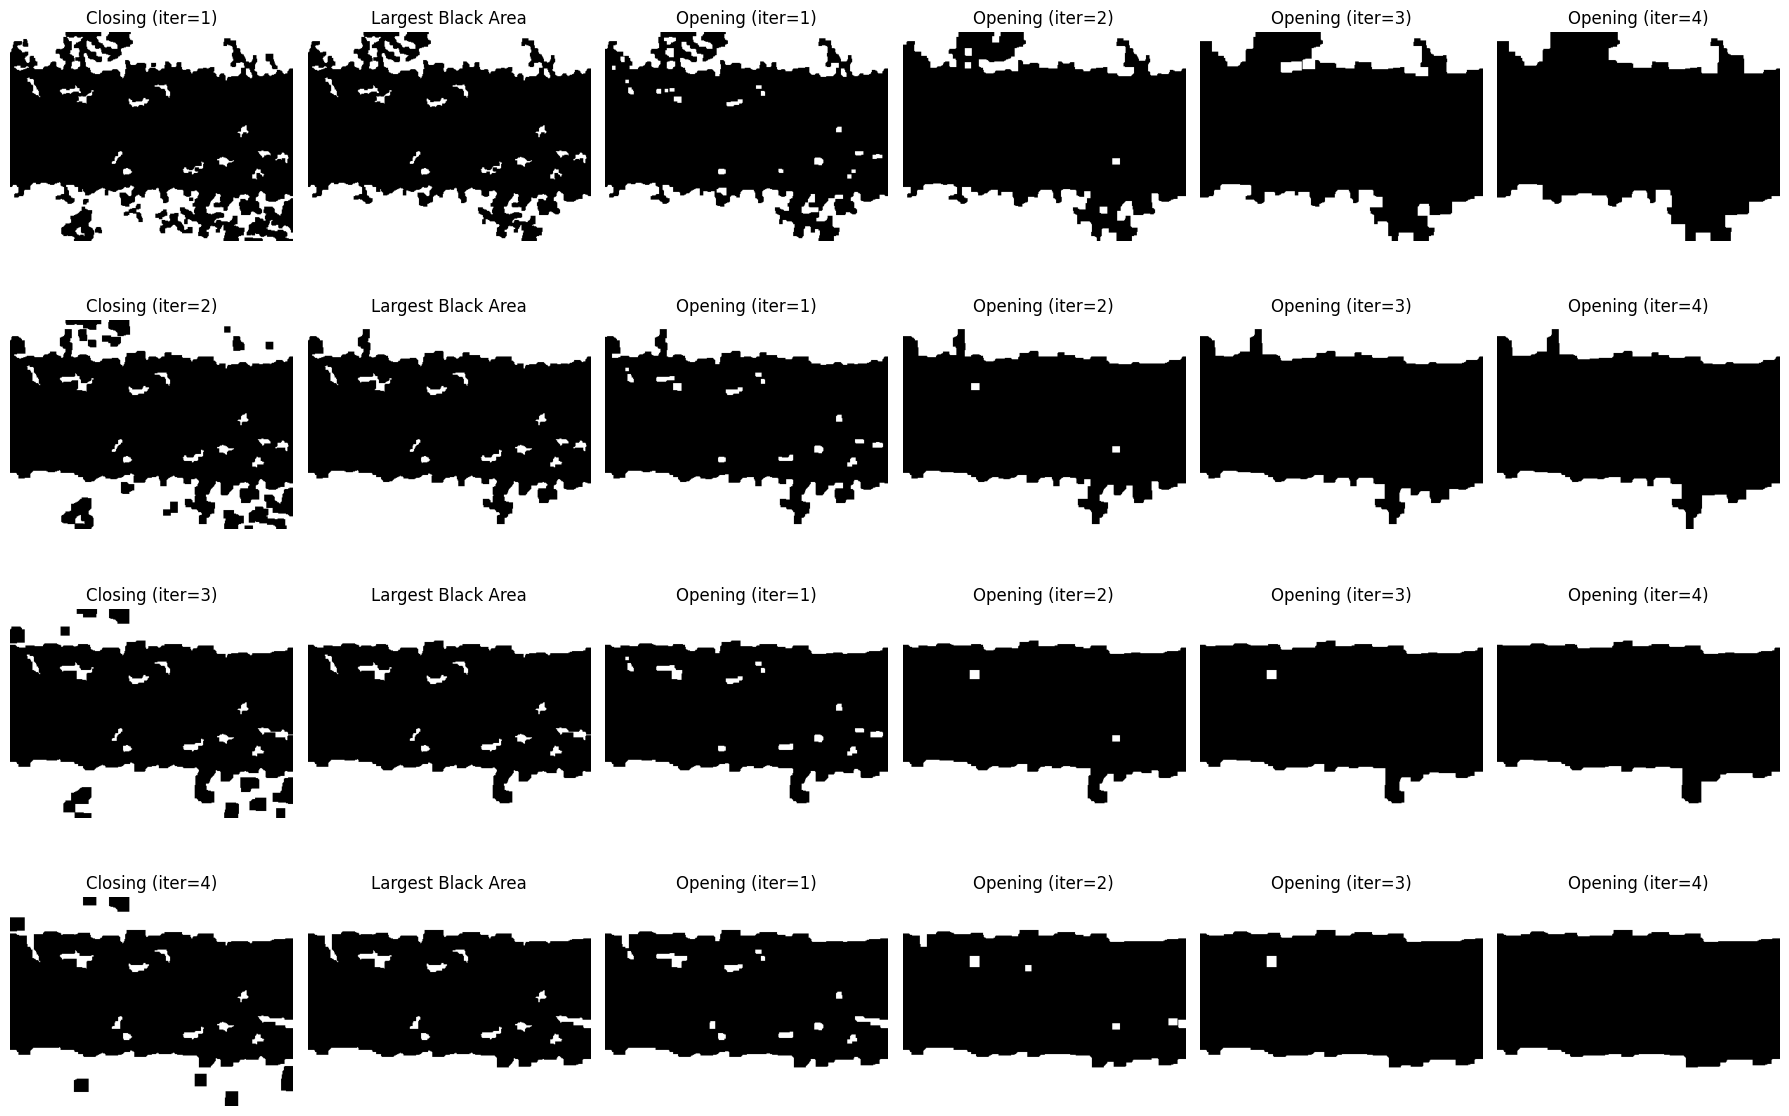

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image = cv2.imread('morphology_ex_01.png', cv2.IMREAD_GRAYSCALE)

# 이진화
_, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# 비교할 Closing 및 Opening iteration 값 리스트
closing_iterations_list = [1, 2, 3, 4]  # Closing iteration 값
opening_iterations_list = [1, 2, 3, 4]  # Opening iteration 값

# 커널 정의
kernel = np.ones((5, 5), np.uint8)

# 그래프 설정 (Closing iteration X (Closing 결과 + Largest Black Area + Opening 결과))
fig, axes = plt.subplots(len(closing_iterations_list), len(opening_iterations_list) + 2, figsize=(18, 12))

for i, closing_iter in enumerate(closing_iterations_list):
    # 1️⃣ Closing 연산 적용 (작은 검은 점 제거)
    closing_result = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=closing_iter)

    # 2️⃣ 연결 요소 분석 (가장 큰 검은색 영역 찾기)
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(255 - closing_result, connectivity=8)

    # 3️⃣ 가장 큰 검은색 영역 선택 (배경 제외)
    largest_component = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])  # 가장 넓은 검은색 객체

    # 4️⃣ 가장 큰 검은색 영역만 남기고 나머지 제거
    filtered = np.zeros_like(binary)
    filtered[labels == largest_component] = 0  # 검은색 유지
    filtered[labels != largest_component] = 255  # 다른 검정 영역 제거

    # 5️⃣ 첫 번째 열에 Closing 결과 출력
    axes[i, 0].imshow(closing_result, cmap='gray')
    axes[i, 0].set_title(f"Closing (iter={closing_iter})")
    axes[i, 0].axis("off")

    # 6️⃣ 두 번째 열에 Largest Black Area 출력
    axes[i, 1].imshow(filtered, cmap='gray')
    axes[i, 1].set_title(f"Largest Black Area")
    axes[i, 1].axis("off")

    # 7️⃣ Opening iteration 적용 후 비교
    for j, opening_iter in enumerate(opening_iterations_list):
        opened_result = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel, iterations=opening_iter)

        axes[i, j + 2].imshow(opened_result, cmap='gray')
        axes[i, j + 2].set_title(f"Opening (iter={opening_iter})")
        axes[i, j + 2].axis("off")

plt.tight_layout()
plt.show()
